In [1]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [2]:

forest = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\fire_archive.csv")

In [3]:
forest.shape


(36011, 15)

In [4]:
forest.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [5]:

forest.isnull()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36007,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36008,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36009,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
forest.describe()


,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


<AxesSubplot:>

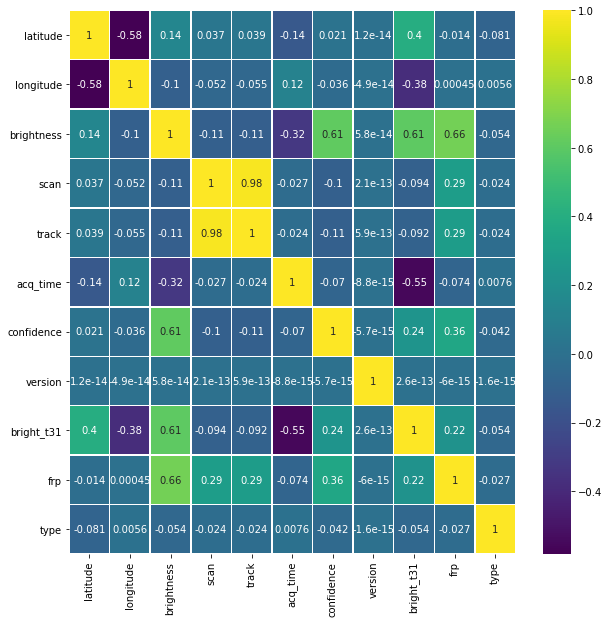

In [7]:


plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

In [8]:

forest = forest.drop(['track'], axis = 1)

In [9]:
print("The scan column")
print(forest['scan'].value_counts())
print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
print()
print("The satellite column")
print(forest['satellite'].value_counts())
print()
print("The instrument column")
print(forest['instrument'].value_counts())
print()
print("The version column")
print(forest['version'].value_counts())
print()
print("The daynight column")
print(forest['daynight'].value_counts())
print()


The scan column
1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4     203
3.3     203
3.8     189
3.9     156
4.7     149
4.3     137
3.5     134
3.7     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: scan, dtype: int64

The aqc_time column
506     851
454     631
122     612
423     574
448     563
       ... 
1558      1
635       1
1153      1
302       1
1519      1
Name: acq_time, Length: 662, dtype: int64

The satellite column
Aqua     20541
Terra    15470
Name: satellite, dtype: int64

The instrument column
MODIS    36011
Name: instrument, dtype: int64

The version column
6.3    36011
Name: version, dtype: int64

The daynight column
D    28203
N     7808
Name: daynight, dtype: int64



In [10]:
forest = forest.drop(['instrument', 'version'], axis = 1)


In [11]:
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,Terra,36,298.8,27.6,D,0


In [12]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

In [13]:
forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)


In [14]:

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,0


In [15]:
forest['type'].value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

In [16]:


types = pd.get_dummies(forest['type'])
forest = pd.concat([forest, types], axis=1)

In [17]:


forest = forest.drop(['type'], axis = 1)
forest.head()


,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0


In [18]:

bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)



In [19]:

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3,scan_binned
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4


In [20]:
forest['acq_date'] = pd.to_datetime(forest['acq_date'])

In [21]:
forest = forest.drop(['scan'], axis = 1)

In [22]:

forest['year'] = forest['acq_date'].dt.year
forest.head()


,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3,scan_binned,year
0,-11.8070,142.0583,313.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1,2019
1,-11.7924,142.0850,319.3,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1,2019
2,-12.8398,132.8744,311.6,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4,2019
3,-14.4306,143.3035,310.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2,2019
4,-12.4953,131.4897,310.3,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4,2019


In [23]:

forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day

In [24]:
forest.shape

(36011, 17)

In [25]:
y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31'], axis = 1)



<AxesSubplot:>

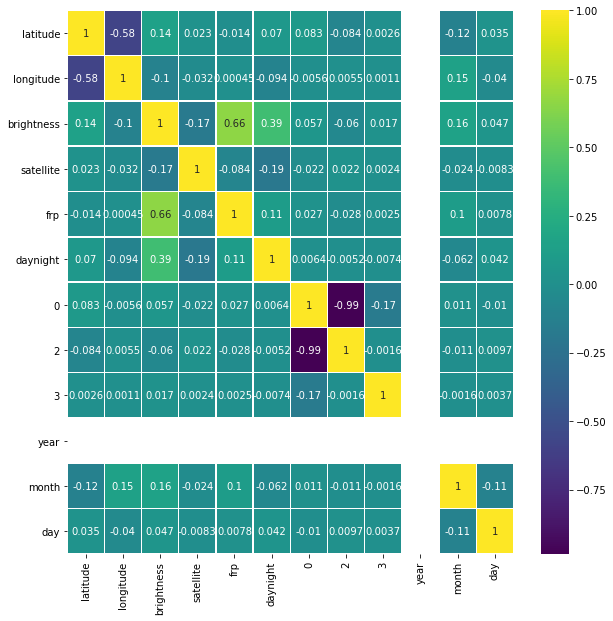

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)


In [27]:

fin.head()

,latitude,longitude,brightness,satellite,frp,daynight,0,2,3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,1,6.6,1,1,0,0,1,2019,8,1
1,-11.7924,142.0850,319.3,1,11.3,1,1,0,0,1,2019,8,1
2,-12.8398,132.8744,311.6,1,23.1,1,1,0,0,4,2019,8,1
3,-14.4306,143.3035,310.1,1,6.5,1,1,0,0,2,2019,8,1
4,-12.4953,131.4897,310.3,1,27.6,1,1,0,0,4,2019,8,1


In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)


In [29]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)


In [30]:
random_model.fit(Xtrain, ytrain)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [31]:
y_pred = random_model.predict(Xtest)

In [32]:
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), "%")

95.27 %


In [33]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

66.46 %


In [34]:
data = pd.read_csv(r'D:\bde unit1-ppts\forestfires.csv')


In [35]:

data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [37]:

data.isna().sum().sum()

0

In [38]:
def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df



In [45]:
def preprocess_inputs(df, task='regression'):
    df = df.copy()
    
    # Ordinal encode month and day columns
    df = ordinal_encode(
        df,
        column='month',
        ordering=[
            'jan',
            'feb',
            'mar',
            'apr',
            'may',
            'jun',
            'jul',
            'aug',
            'sep',
            'oct',
            'nov',
            'dec'
        ]
    )
    df = ordinal_encode(
        df,
        column='day',
        ordering=[
            'sun',
            'mon',
            'tue',
            'wed',
            'thu',
            'fri',
            'sat'
        ]
    )
    
    # Split df into X and y
    if task == 'regression':
        y = df['area']
    elif task == 'classification':
        y = df['area'].apply(lambda x: 1 if x > 0 else 0)
    
    X = df.drop('area', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale feature data (X)
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test



In [46]:

X_train, X_test, y_train, y_test = preprocess_inputs(data, task='regression')



In [47]:

X_train


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.609497,0.549280,0.653317,-0.970161,0.060985,0.279029,0.572473,-0.406018,0.401972,-0.078036,-0.989687,-0.093528
1,-1.116216,-1.839756,-1.924250,-1.442804,-0.195757,-0.895350,-1.761748,0.137308,-2.243125,0.993349,1.363841,-0.093528
2,-0.253360,0.549280,0.223722,0.447767,-0.179711,2.460689,1.039077,-0.698578,-0.250931,0.678236,-0.473059,-0.093528
3,-0.253360,-0.247066,-1.924250,-0.497519,-0.388314,-1.295139,-1.899971,-1.074727,-0.803388,-0.015014,-0.702671,-0.093528
4,0.178069,-0.247066,0.223722,0.447767,0.686796,1.776676,0.620811,1.035885,0.234561,-0.078036,-0.702671,-0.093528
...,...,...,...,...,...,...,...,...,...,...,...,...
356,-1.116216,0.549280,1.082911,-1.442804,0.333774,-0.970311,0.593645,-0.029870,-0.585754,-0.519195,-1.735927,-0.093528
357,-1.116216,0.549280,0.223722,-0.024876,0.799121,-0.136376,-0.119444,0.889605,0.820500,-0.708263,0.847213,-0.093528
358,0.178069,-0.247066,-1.924250,0.920409,0.189357,-1.176452,-1.860422,0.011925,-0.552272,-1.149422,1.363841,-0.093528
359,1.472353,1.345625,0.223722,-1.442804,0.141217,0.527336,0.232507,0.346279,0.117373,-0.141059,1.076825,-0.093528


In [48]:

y_train

13       0.00
61       0.00
453      0.00
39       0.00
373      0.00
        ...  
129      0.00
144      0.77
72       0.00
235    196.48
37       0.00
Name: area, Length: 361, dtype: float64

In [50]:

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

print("Linear Regression R^2: {:.5f}".format(lin_reg_model.score(X_test, y_test)))


Linear Regression R^2: 0.02156


In [51]:
nn_reg_model = MLPRegressor(hidden_layer_sizes=(16, 16))
nn_reg_model.fit(X_train, y_train)

print("NN Regression R^2: {:.5f}".format(nn_reg_model.score(X_test, y_test)))



NN Regression R^2: 0.04091


In [52]:
X_train, X_test, y_train, y_test = preprocess_inputs(data, task='classification')


In [53]:
X_train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.609497,0.549280,0.653317,-0.970161,0.060985,0.279029,0.572473,-0.406018,0.401972,-0.078036,-0.989687,-0.093528
1,-1.116216,-1.839756,-1.924250,-1.442804,-0.195757,-0.895350,-1.761748,0.137308,-2.243125,0.993349,1.363841,-0.093528
2,-0.253360,0.549280,0.223722,0.447767,-0.179711,2.460689,1.039077,-0.698578,-0.250931,0.678236,-0.473059,-0.093528
3,-0.253360,-0.247066,-1.924250,-0.497519,-0.388314,-1.295139,-1.899971,-1.074727,-0.803388,-0.015014,-0.702671,-0.093528
4,0.178069,-0.247066,0.223722,0.447767,0.686796,1.776676,0.620811,1.035885,0.234561,-0.078036,-0.702671,-0.093528
...,...,...,...,...,...,...,...,...,...,...,...,...
356,-1.116216,0.549280,1.082911,-1.442804,0.333774,-0.970311,0.593645,-0.029870,-0.585754,-0.519195,-1.735927,-0.093528
357,-1.116216,0.549280,0.223722,-0.024876,0.799121,-0.136376,-0.119444,0.889605,0.820500,-0.708263,0.847213,-0.093528
358,0.178069,-0.247066,-1.924250,0.920409,0.189357,-1.176452,-1.860422,0.011925,-0.552272,-1.149422,1.363841,-0.093528
359,1.472353,1.345625,0.223722,-1.442804,0.141217,0.527336,0.232507,0.346279,0.117373,-0.141059,1.076825,-0.093528


In [54]:

y_train


13     0
61     0
453    0
39     0
373    0
      ..
129    0
144    1
72     0
235    1
37     0
Name: area, Length: 361, dtype: int64

In [55]:
lin_clf_model = LogisticRegression()
lin_clf_model.fit(X_train, y_train)

print("Linear Classification Accuracy: {:.2f}%".format(lin_clf_model.score(X_test, y_test) * 100))


Linear Classification Accuracy: 50.64%
